# 20200929 Chapter6&9 22019207065 张泽远

<font><font size=4>Chapter6 Optimization</font></font>

In [2]:
from scipy import optimize

In [4]:
import cvxopt

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume - 1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [6]:
 _.evalf()


In [7]:
Area_r.diff(r, 2).subs(r, rsol)

In [8]:
Area_r.subs(r, rsol)

In [9]:
 _.evalf()


In [10]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r
r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [11]:
 f(r_min)

In [12]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

In [14]:
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [16]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in(x1, x2)]
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [20]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [24]:
def func_XY_X_Y(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))
f = func_XY_X_Y(f_lmbda)
fprime = func_XY_X_Y(fprime_lmbda)
fhess = func_XY_X_Y(fhess_lmbda)
X_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


In [25]:
X_opt

array([1.88292613, 1.37658523])

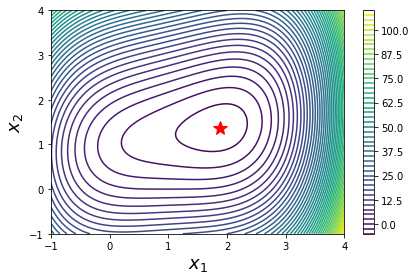

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(X_opt[0], X_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
fig.savefig('ch6-examaple-two-dim.pdf');

In [27]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)


Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [28]:
x_opt

array([1.88292645, 1.37658596])

In [29]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [31]:
x_opt

array([1.88292612, 1.37658523])

In [32]:
 x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


In [33]:
x_opt

array([1.88292644, 1.37658595])

In [34]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
x_start

array([1.5, 1.5])

In [35]:
f(x_start)

In [36]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [37]:
x_opt

array([1.47586906, 1.48365787])

In [38]:
f(x_opt)

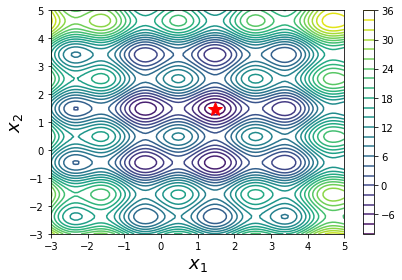

In [40]:
def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
fig.savefig('ch6-example-2d-many-minima.pdf');

In [41]:
 x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [45]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))


In [46]:
def g(beta):
    return ydata - f(xdata, *beta)
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.23590611, 0.79130045, 0.5129765 ])

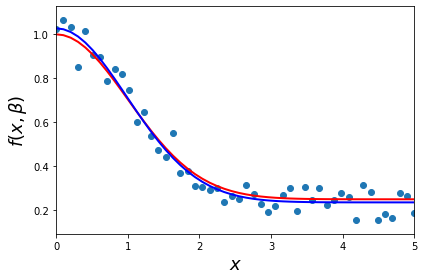

In [47]:
fig, ax = plt.subplots()

ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

fig.tight_layout()
fig.savefig('ch6-nonlinear-least-square.pdf')

In [48]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.23590611, 0.79130045, 0.5129765 ])

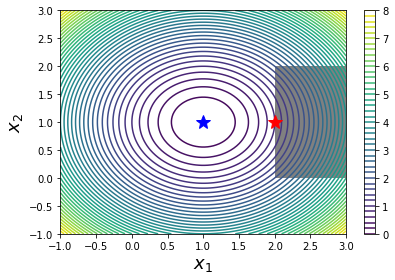

In [49]:
def f(X):
    x, y = X
    return (x-1)**2 + (y-1)**2
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), 
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
                           facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()
fig.savefig('ch6-example-constraint-bound.pdf');

In [50]:
x = x1, x2, x3, l = sympy.symbols("x_1, x_2, x_3, lambda")
f = x1 * x2 * x3
g = 2 * (x1 * x2 + x2 * x3 + x3 * x1) - 1
L = f + l * g
grad_L = [sympy.diff(L, x_) for x_ in x]
sols = sympy.solve(grad_L)
sols

In [51]:
g.subs(sols[0])

In [52]:
f.subs(sols[0])

In [53]:
def f(X):
    return -X[0] * X[1] * X[2]
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1
constraints = [dict(type='eq', fun=g)]
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', constraints=constraints)
result

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

In [54]:
result.x

array([0.40824188, 0.40825127, 0.40825165])

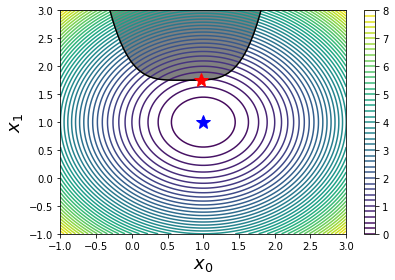

In [55]:
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2

def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
constraints = [dict(type='ineq', fun=g)]
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x
x_cons_opt = optimize.minimize(f, (0, 0), method='COBYLA', constraints=constraints).x
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)

ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color="grey")
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)

fig.tight_layout()
fig.savefig('ch6-example-constraint-inequality.pdf');

In [56]:
c = np.array([-1.0, 2.0, -3.0])

A = np.array([[ 1.0, 1.0, 0.0],
              [-1.0, 3.0, 0.0],
              [ 0.0, -1.0, 1.0]])

b = np.array([1.0, 2.0, 3.0])
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)
sol = cvxopt.solvers.lp(c_, A_, b_)

Optimal solution found.


In [57]:
x = np.array(sol['x'])
x

array([[0.25],
       [0.75],
       [3.75]])

In [58]:
sol

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 2.7755575615628914e-17,
 'dual infeasibility': 2.967195843610875e-17,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [59]:
sol['primal objective']

<font><font size=4>Chapter9 Ordinary Differential Equations</font></font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
sympy.init_printing()

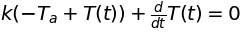

In [2]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode)

In [3]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [4]:
ode_sol.lhs

In [5]:
ode_sol.rhs

In [6]:
ics = {T(0): T0}
ics

In [7]:
C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

In [8]:
C_sol = sympy.solve(C_eq)
C_sol

In [9]:
ode_sol.subs(C_sol[0])

In [10]:
def apply_ics(sol, ics, x, known_params):
  
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [11]:
ode_sol

In [12]:
apply_ics(ode_sol, ics, t, [k, Ta])

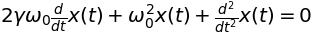

In [13]:
t, omega0, gamma= sympy.symbols("t, omega_0, gamma",positive=True)
x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) +omega0**2 * x(t)
sympy.Eq(ode)

In [14]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [15]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

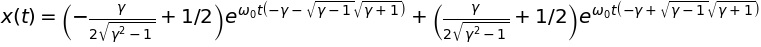

In [16]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

In [17]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

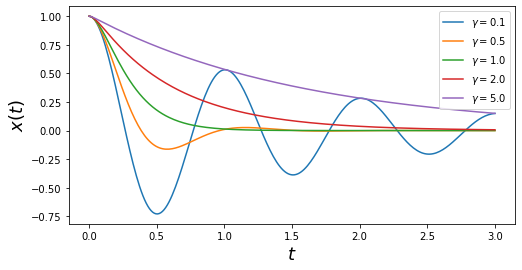

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0,gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$x(t)$", fontsize=18)
    ax.legend()

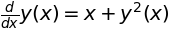

In [25]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [26]:
sympy.dsolve(y(x).diff(x) - f)

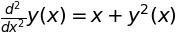

In [27]:
sympy.Eq(y(x).diff(x, x), f)

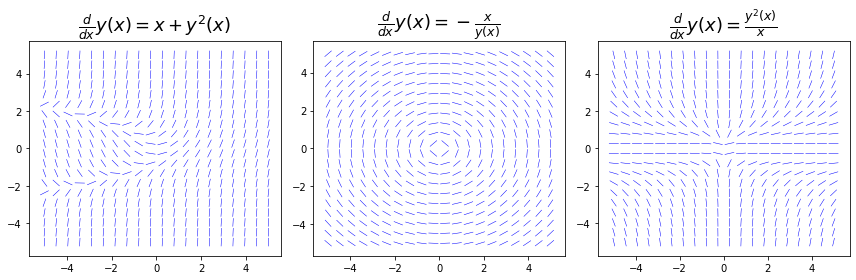

In [29]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

x = sympy.symbols("x")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

fig.tight_layout()
fig.savefig('ch9-direction-field.pdf')

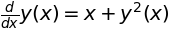

In [30]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [31]:
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
ode_sol

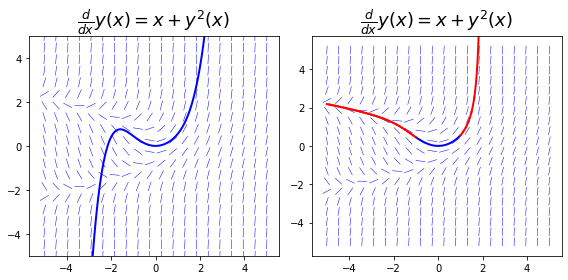

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)

ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())(x_vec), 'r', lw=2)

for x0 in np.arange(1, 5, dx):
    x_vec = np.linspace(-x0-dx, -x0, 100)
    ics = {y(-x0): ode_sol_m.rhs.removeO().subs(x, -x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec), 'r', lw=2)
    
fig.tight_layout()
fig.savefig("ch9-direction-field-and-approx-sol.pdf")

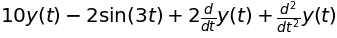

In [33]:
t = sympy.symbols("t", positive=True)
s, Y = sympy.symbols("s, Y", real=True)
y = sympy.Function("y")
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)
ode

In [34]:
L_y = sympy.laplace_transform(y(t), t, s)
L_y

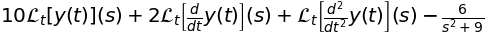

In [35]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
L_ode

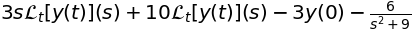

In [36]:
def laplace_transform_derivatives(e):
    """
    Evaluate the unevaluted laplace transforms of derivatives
    of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e
L_ode_2 = laplace_transform_derivatives(L_ode)
L_ode_2

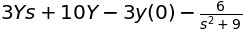

In [37]:
L_ode_3 = L_ode_2.subs(L_y, Y)
L_ode_3

In [38]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

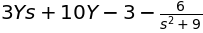

In [39]:
L_ode_4 = L_ode_3.subs(ics)
L_ode_4

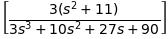

In [40]:
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

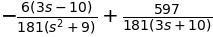

In [41]:
sympy.apart(Y_sol[0])

In [42]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)

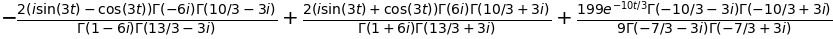

In [43]:
sympy.simplify(y_sol)

In [45]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

In [46]:
f_np = sympy.lambdify((y(x), x), f)

In [47]:
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

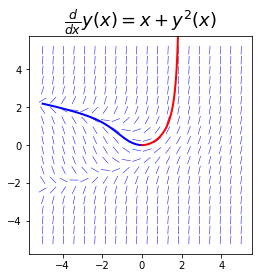

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

In [49]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]
xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

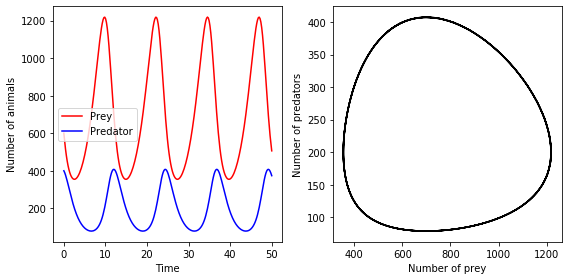

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")
fig.tight_layout()
fig.savefig('ch9-lokta-volterra.pdf')

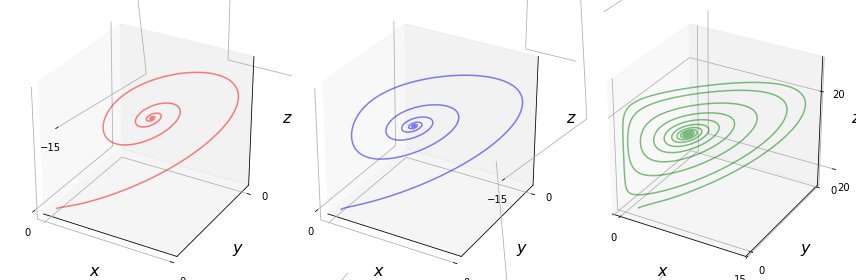

In [51]:
def f(xyz, t, rho, sigma, beta):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]
sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

fig.tight_layout()
fig.savefig('ch9-lorenz-equations.pdf')

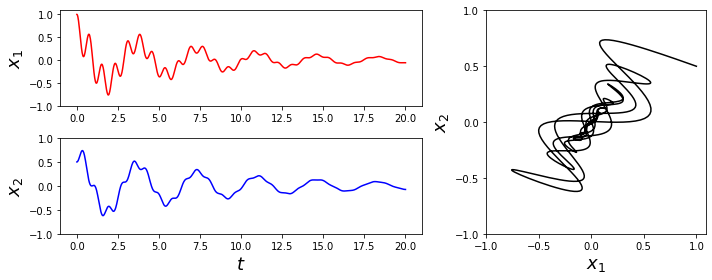

In [52]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [y[1], 
            - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1], 
            y[3], 
            - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3] ]
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f)
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()
fig.savefig('ch9-coupled-damped-springs.pdf')

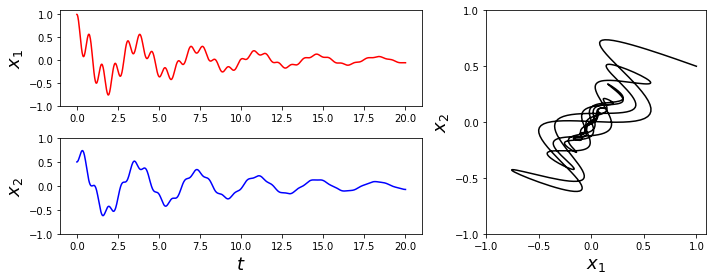

In [54]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [[0, 1, 0, 0], 
            [- k1/m1 - k2/m1, - g1/m1 * y[1], k2/m1, 0],
            [0, 0, 1, 0],
            [k2/m2, 0, - k2/m2, - g2/m2]]
r = integrate.ode(f, jac).set_f_params(args).set_jac_params(args).set_initial_value(y0, t[0])
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()

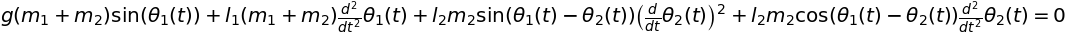

In [55]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [[0, 1, 0, 0],
            [- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0],
            [0, 0, 1, 0],
            [k2/m2, 0, - k2/m2, - g2/m2]]
r = integrate.ode(f, jac)
r.set_jac_params(args);
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)
ode1 = sympy.Eq((m1+m2)*l1 * theta1(t).diff(t,t) +m2*l2 * theta2(t).diff(t,t) * sympy.cos(theta1(t)-theta2(t)) +m2*l2 * theta2(t).diff(t)**2 * sympy.
sin(theta1(t)-theta2(t)) +g*(m1+m2) * sympy.sin(theta1(t)))
ode1

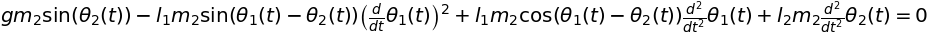

In [56]:
ode2 = sympy.Eq(m2*l2 * theta2(t).diff(t,t) +m2*l1 * theta1(t).diff(t,t) * sympy.cos(theta1(t)-theta2(t)) -m2*l1 * theta1(t).diff(t)**2 * sympy.sin(theta1(t) - theta2(t)) +m2*g * sympy.sin(theta2(t)))

ode2

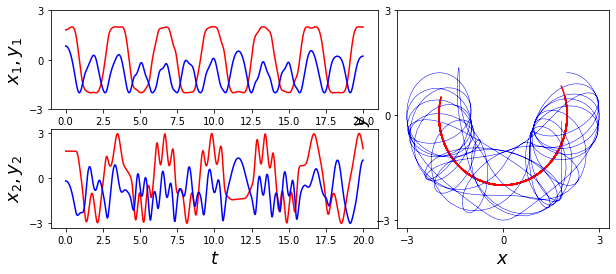

In [59]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),theta1(t): y1(t),theta2(t).diff(t, t): y4(t).diff(t),theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t),dict=True)
f = y.diff(t).subs(vcsol[0])
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}
_f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
f_np = lambda _t, _y, *args: _f_np(_t, _y)
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])
_jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')
jac_np = lambda _t, _y, *args: _jac_np(_t, _y)
y0 = [2.0, 0, 0, 0]
tt = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])
dt = tt[1] - tt[0]
yy = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
    yy[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1
theta1_np, theta2_np = yy[:, 0], yy[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
ax1.plot(tt, x1, 'r')
ax1.plot(tt, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(tt, x2, 'r')
ax2.plot(tt, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])
ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])

<font><font size=4>作业1 函数优化</font></font>

In [1]:
import numpy as np
from scipy.optimize import minimize
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [2]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [3]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [4]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [5]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


array([1., 1., 1., 1., 1.])

<font><font size=4>作业2 偏微分方程求解及画图</font></font>

In [6]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
print(dsolve(eq, f(x)))
C1 = symbols('C1')
eqr = -C1/(C1 - exp(x))
eqr1 = eqr.subs(x, 0)
print(solveset(eqr1 - 1, C1))
eqr2 = eqr.subs(C1, 1/2)

Eq(f(x), -C1/(C1 - exp(x)))
{1/2}


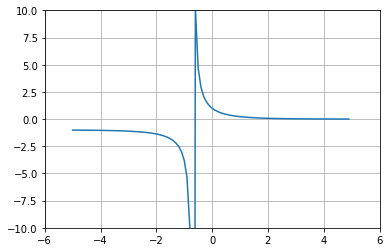

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x_1 = np.arange(-5, 5, 0.1)
y_1 = [-0.5/(0.5 - exp(x)) for x in x_1]
plt.plot(x_1, y_1)
plt.axis([-6,6,-10,10])
plt.grid()
plt.show()